# Bike Sharing Analysis with Ford GoBike Data by Eda Sanli
## Preliminary Wrangling

> This document explores a dataset containing values like bike trip, time, duration, user type between 2019-2020.

https://www.lyft.com/bikes/bay-wheels/system-data

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preliminary-Wrangling" data-toc-modified-id="Preliminary-Wrangling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preliminary Wrangling</a></span></li><li><span><a href="#Gathering-Data-" data-toc-modified-id="Gathering-Data--2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Gathering Data <a name="gathering"></a></a></span></li><li><span><a href="#Assessing-Data" data-toc-modified-id="Assessing-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Assessing Data</a></span><ul class="toc-item"><li><span><a href="#What-is-the-structure-of-this-dataset?" data-toc-modified-id="What-is-the-structure-of-this-dataset?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>What is the structure of this dataset?</a></span></li><li><span><a href="#What-is/are-the-main-feature(s)-of-interest-in-this-dataset?" data-toc-modified-id="What-is/are-the-main-feature(s)-of-interest-in-this-dataset?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>What is/are the main feature(s) of interest in this dataset?</a></span></li><li><span><a href="#What-features-in-the-dataset-will-help-support-my-investigation?" data-toc-modified-id="What-features-in-the-dataset-will-help-support-my-investigation?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>What features in the dataset will help support my investigation?</a></span></li></ul></li><li><span><a href="#Cleaning-Data-" data-toc-modified-id="Cleaning-Data--4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cleaning Data <a name="cleanig"></a></a></span></li><li><span><a href="#Explanatory-Analysis-Questions" data-toc-modified-id="Explanatory-Analysis-Questions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Explanatory Analysis Questions</a></span><ul class="toc-item"><li><span><a href="#What-kind-of-development-trend-do-we-see-on-bike-rides?" data-toc-modified-id="What-kind-of-development-trend-do-we-see-on-bike-rides?-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>What kind of development trend do we see on bike rides?</a></span></li><li><span><a href="#On-which-week-days-do-we-observe-more-rides?" data-toc-modified-id="On-which-week-days-do-we-observe-more-rides?-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>On which week days do we observe more rides?</a></span></li><li><span><a href="#On-which-week-day/-hour-of-the-day-do-we-observe-more-rides?" data-toc-modified-id="On-which-week-day/-hour-of-the-day-do-we-observe-more-rides?-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>On which week day/ hour of the day do we observe more rides?</a></span></li><li><span><a href="#Which-user-types-have-been-growing-over-the-last-months?-(ikili-bar)" data-toc-modified-id="Which-user-types-have-been-growing-over-the-last-months?-(ikili-bar)-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Which user types have been growing over the last months? (ikili bar)</a></span></li><li><span><a href="#Do-we-see-different--behaviours-on-the-week-of-the-day/hour-of-the-day-between-subscribers-and-customers?" data-toc-modified-id="Do-we-see-different--behaviours-on-the-week-of-the-day/hour-of-the-day-between-subscribers-and-customers?-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Do we see different  behaviours on the week of the day/hour of the day between subscribers and customers?</a></span></li><li><span><a href="#What-is-the-average-trip-duration-per-user-group?" data-toc-modified-id="What-is-the-average-trip-duration-per-user-group?-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>What is the average trip duration per user group?</a></span></li><li><span><a href="#What-is-the-average-trip-distance-per-user-group?" data-toc-modified-id="What-is-the-average-trip-distance-per-user-group?-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>What is the average trip distance per user group?</a></span></li><li><span><a href="#Who-is-faster-rider,-subscribers-or-customers?" data-toc-modified-id="Who-is-faster-rider,-subscribers-or-customers?-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Who is faster rider, subscribers or customers?</a></span></li><li><span><a href="#How-rental-access-methods-behave-differently-in-each-user-type?" data-toc-modified-id="How-rental-access-methods-behave-differently-in-each-user-type?-5.9"><span class="toc-item-num">5.9&nbsp;&nbsp;</span>How rental access methods behave differently in each user type?</a></span></li><li><span><a href="#What-kind-of-trend-do-we-observe-on-Bike-Share-for-All-users?" data-toc-modified-id="What-kind-of-trend-do-we-observe-on-Bike-Share-for-All-users?-5.10"><span class="toc-item-num">5.10&nbsp;&nbsp;</span>What kind of trend do we observe on Bike Share for All users?</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import glob
import os
import datetime
import datetime as dt
import matplotlib.ticker as tick
import math

# Table of Content:
* [Gathering Data](#gathering)
* [Cleaning Data](#cleaning)

## Gathering Data <a name="gathering"></a>

In [2]:
#I've downloaded the csv files from the FordGoBike websiteon my computer, then used the glob and os modules to load and combine the files into one new file, bike_master.csv:

path = r'C:\Users\eda.sanli\Desktop\udacity'

files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)

df.to_csv('bike_master.csv', index = False)

C:\Users\eda.sanli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  import sys
C:\Users\eda.sanli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  import sys
C:\Users\eda.sanli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  import sys
C:\Users\eda.sanli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sy

In [3]:
#reading the new file and storing it in a dataframe called df.
df = pd.read_csv('bike_master.csv')

C:\Users\eda.sanli\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Assessing Data

In [4]:
#checking the general info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235191 entries, 0 to 3235190
Data columns (total 15 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(6), int64(2), object(7)
memory usage: 370.2+ MB


In [5]:
#checking sample data from the dataframe to identify any data quality issues.
df.sample(10)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
2442818,1830,NaN,479,3.0,37.786375,-122.404904,Powell St BART Station (Market St at 4th St),2019-12-09 06:51:59.2780,NaN,58.0,37.776619,-122.417385,Market St at 10th St,2019-12-09 06:43:59.3960,Subscriber
875285,2060,No,764,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-05-31 11:03:56.0330,NaN,246.0,37.869060,-122.270556,Berkeley Civic Center,2019-05-31 10:51:11.1810,Subscriber
133160,5366,No,133,44.0,37.781074,-122.411738,Civic Center/UN Plaza BART Station (Market St ...,2019-01-12 09:36:47.7210,NaN,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2019-01-12 09:34:34.1410,Subscriber
1320585,616,No,630,168.0,37.849595,-122.265569,Alcatraz Ave at Shattuck Ave,2019-07-17 16:26:25.3780,NaN,241.0,37.852477,-122.270213,Ashby BART Station,2019-07-17 16:15:55.0950,Customer
917155,277,No,353,123.0,37.760594,-122.414817,Folsom St at 19th St,2019-05-23 18:39:11.9100,NaN,107.0,37.763015,-122.426497,17th St at Dolores St,2019-05-23 18:33:18.0090,Subscriber
2087489,12937,Yes,405,310.0,37.335885,-121.885660,San Fernando St at 4th St,2019-10-11 09:47:09.8760,NaN,305.0,37.342725,-121.895617,Ryland Park,2019-10-11 09:40:24.2450,Subscriber
2349823,1820,No,1899,133.0,37.755213,-122.420975,Valencia St at 22nd St,2019-11-01 17:31:21.9390,NaN,23.0,37.791464,-122.391034,The Embarcadero at Steuart St,2019-11-01 16:59:42.1670,Subscriber
2005565,12895,No,1338,8.0,37.799953,-122.398525,The Embarcadero at Vallejo St,2019-10-22 16:40:58.9590,NaN,104.0,37.767045,-122.390833,4th St at 16th St,2019-10-22 16:18:40.0820,Customer
3066967,565362,NaN,507,23.0,37.791464,-122.391034,The Embarcadero at Steuart St,2020-02-10 10:06:44,app,81.0,37.775880,-122.393170,Berry St at 4th St,2020-02-10 09:58:17,Subscriber
2992386,420759,NaN,86,NaN,37.763562,-122.476222,NaN,2020-02-07 12:26:50,app,NaN,37.763591,-122.476234,NaN,2020-02-07 12:25:24,Customer


In [6]:
#checking the shape of the dataframe
df.shape

(3235191, 15)

In [7]:
#checking duplicated values
df.duplicated().sum()

0

In [8]:
#checking naan values
df.isna().sum()

bike_id                          0
bike_share_for_all_trip     971467
duration_sec                     0
end_station_id              502982
end_station_latitude             0
end_station_longitude            0
end_station_name            501853
end_time                         0
rental_access_method       2610764
start_station_id            500933
start_station_latitude           0
start_station_longitude          0
start_station_name          499752
start_time                       0
user_type                        0
dtype: int64

### What is the structure of this dataset?

There are 3,235,191 bike trips in this dataset with 15 features. 

**Numerical variables**: bike_id, duration_sec,end_station_id, end_station_latitude, end_station_longtitude, start_station_id, start_station_latitude, start_station_longtitude, 

**Non-numerical variables**: bike_share_for_all_trip, end_station_name, end_time, rental_access_method,start_station_name, start_time, user_type


### What is/are the main feature(s) of interest in this dataset?

I'm mostly interested in figuring out how timing (week day, hour of the day) has an impact on user type and behavior.

### What features in the dataset will help support my investigation?

I assume features like start_time, duration, user_type will have the biggest role in this analysis, although data should be expanded by extracting some subvalues from these data points. On top of this, rental_access_method, bike_share_for_all_trip features will enrich the analysis and help me to understand user behavior.

**Data Issues**

1. start_time and end_time columns should be timestamp format
2. bike_id is an integer 
3. Data has week days can be extracted from start_time and end_time columns for further analysis.
4. Start_time column has hour that can be extracted as start_hour.
5. Double check if duration secs are correct
6. There is no distance column although can be calculated by lat/long info
7. There are irrelevant columns for the analysis like start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude 

## Cleaning Data <a name="cleanig"></a>

In [9]:
#copy dataframe
df_clean = df.copy()

**1. start_time and end_time columns should be timestamp format**

**Define**

Convert start_time and end_time columns to timestamp format

**Code**

In [10]:
#archive_data_clean['timestamp'] = archive_data_clean['timestamp'].str[:-6]
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

**Test**

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235191 entries, 0 to 3235190
Data columns (total 15 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  object
dtypes: datetime64[ns](2), float64(6), int64(2), object(5)
memory usage: 370.2+ MB


**2. bike_id is an integer**

**Define**

change bike_id column from integer to string

**Code**

In [12]:
df_clean['bike_id'] = df_clean['bike_id'].astype(str)

**Clean**

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235191 entries, 0 to 3235190
Data columns (total 15 columns):
bike_id                    object
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  object
dtypes: datetime64[ns](2), float64(6), int64(1), object(6)
memory usage: 370.2+ MB


**3. Data has week days can be extracted from start_time.**

**Define**

Extract week days from start_time column

**Code**

In [14]:
df_clean['weekday'] = df_clean['start_time'].apply(lambda x: dt.datetime.strftime(x, '%A'))

**Test**

In [15]:
df_clean.weekday.value_counts()

Thursday     543363
Tuesday      535161
Wednesday    534043
Friday       518827
Monday       494937
Saturday     321364
Sunday       287496
Name: weekday, dtype: int64

In [16]:
df_clean['weekday'].isna().sum()

0

**4. Start_time column has hour that can be extracted as start_hour.**

**Define**

Extract hour from start_time column

**Code**

In [17]:
df_clean['start_hour'] = df_clean['start_time'].dt.hour


**Test**

In [18]:
df_clean.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,weekday,start_hour
0,4861,No,80825,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.864,NaN,229.0,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.613,Subscriber,Thursday,17
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.173,NaN,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.886,Subscriber,Thursday,20
2,2717,No,62633,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.530,NaN,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.924,Customer,Thursday,18
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.318,NaN,85.0,37.770083,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.719,Customer,Thursday,19
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.065,NaN,16.0,37.794130,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.541,Customer,Thursday,14


**5. Double check if duration seconds are correct in duration_sec column**

**Define**

Calculate the seconds differnece between end_time and start_time columns and compare the results with duration_sec column

**Code**

In [19]:
df_clean['diff_seconds'] = df_clean['end_time'] - df_clean['start_time']
df_clean['diff_seconds'] = df_clean['diff_seconds']/np.timedelta64(1,'s')
df_clean['diff_seconds'] = df_clean['diff_seconds'].astype(int)

**Test**

In [20]:
# we can see that there are some values with negative results, because of the errors in start and end time values.

df_clean.sort_values(by = 'diff_seconds', ascending = True)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,weekday,start_hour,diff_seconds
2342144,1885,No,410,125.0,37.759200,-122.409851,20th St at Bryant St,2019-11-03 01:02:28.758,NaN,109.0,37.763316,-122.421904,17th St at Valencia St,2019-11-03 01:55:37.905,Subscriber,Sunday,1,-3189
2342143,2401,No,414,125.0,37.759200,-122.409851,20th St at Bryant St,2019-11-03 01:02:30.447,NaN,109.0,37.763316,-122.421904,17th St at Valencia St,2019-11-03 01:55:36.152,Subscriber,Sunday,1,-3185
2342139,2359,No,509,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-11-03 01:04:54.536,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2019-11-03 01:56:25.083,Customer,Sunday,1,-3090
2342141,737,No,604,95.0,37.766219,-122.431060,Sanchez St at 15th St,2019-11-03 01:03:18.677,NaN,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2019-11-03 01:53:14.617,Customer,Sunday,1,-2995
2342140,11536,Yes,629,349.0,37.781010,-122.405666,Howard St at Mary St,2019-11-03 01:04:08.087,NaN,33.0,37.781650,-122.415408,Golden Gate Ave at Hyde St,2019-11-03 01:53:38.578,Subscriber,Sunday,1,-2970
2342134,9973,No,643,130.0,37.757704,-122.391885,22nd St Caltrain Station,2019-11-03 01:09:56.715,NaN,139.0,37.751017,-122.411901,Garfield Square (25th St at Harrison St),2019-11-03 01:59:13.155,Customer,Sunday,1,-2956
2342142,10832,No,652,95.0,37.766219,-122.431060,Sanchez St at 15th St,2019-11-03 01:03:17.964,NaN,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2019-11-03 01:52:25.884,Subscriber,Sunday,1,-2947
2342136,10449,No,955,321.0,37.780645,-122.402866,Folsom St at 5th St,2019-11-03 01:05:57.713,NaN,98.0,37.765052,-122.421866,Valencia St at 16th St,2019-11-03 01:50:02.261,Customer,Sunday,1,-2644
2342137,798,No,967,321.0,37.780645,-122.402866,Folsom St at 5th St,2019-11-03 01:05:50.979,NaN,98.0,37.765052,-122.421866,Valencia St at 16th St,2019-11-03 01:49:43.895,Customer,Sunday,1,-2632
2342126,10968,No,1121,300.0,37.317298,-121.884995,Palm St at Willow St,2019-11-03 01:18:19.034,NaN,294.0,37.327581,-121.884559,Pierce Ave at Market St,2019-11-03 01:59:37.722,Customer,Sunday,1,-2478


**Code #2**

In [21]:
#let's filter out these rows with negative values

df_clean = df_clean[df_clean['diff_seconds'] > 0]

**Test**

In [22]:
#double check to see if we still have these negative values
df_clean.sort_values(by = 'diff_seconds', ascending = True)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,weekday,start_hour,diff_seconds
3091897,866334,NaN,60,NaN,37.777784,-122.422852,NaN,2020-02-03 07:55:17.000,clipper,NaN,37.777815,-122.422875,NaN,2020-02-03 07:54:17.000,Subscriber,Monday,7,60
3100034,702974,NaN,60,NaN,37.779373,-122.460750,NaN,2020-02-20 17:05:03.000,app,NaN,37.779310,-122.460746,NaN,2020-02-20 17:04:03.000,Subscriber,Thursday,17,60
3208651,842284,NaN,60,323.0,37.798014,-122.405950,Broadway at Kearny,2020-02-04 14:09:58.000,app,323.0,37.798014,-122.405950,Broadway at Kearny,2020-02-04 14:08:58.000,Subscriber,Tuesday,14,60
2706675,219569,NaN,60,63.0,37.775910,-122.402575,Bryant St at 6th St,2020-01-21 15:47:04.000,app,63.0,37.775910,-122.402575,Bryant St at 6th St,2020-01-21 15:46:04.000,Subscriber,Tuesday,15,60
2718481,485201,NaN,60,NaN,37.777732,-122.408939,NaN,2020-01-27 19:48:58.000,app,NaN,37.777160,-122.408233,NaN,2020-01-27 19:47:58.000,Subscriber,Monday,19,60
2957237,250467,NaN,60,NaN,37.752277,-122.421701,NaN,2020-02-15 07:35:49.000,clipper,NaN,37.752254,-122.421693,NaN,2020-02-15 07:34:49.000,Subscriber,Saturday,7,60
2504442,673830,NaN,60,NaN,37.790594,-122.442296,NaN,2019-12-28 13:00:14.000,app,NaN,37.790644,-122.442275,NaN,2019-12-28 12:59:14.000,Subscriber,Saturday,12,60
2671787,946472,NaN,60,NaN,37.766307,-122.396064,NaN,2020-01-24 16:37:02.000,app,NaN,37.766292,-122.396095,NaN,2020-01-24 16:36:02.000,Customer,Friday,16,60
2674864,613034,NaN,60,NaN,37.767022,-122.406786,NaN,2020-01-15 16:15:24.000,app,NaN,37.767042,-122.406758,NaN,2020-01-15 16:14:24.000,Customer,Wednesday,16,60
2717597,806293,NaN,60,NaN,37.777046,-122.417271,NaN,2020-01-24 16:11:39.000,app,NaN,37.777022,-122.417227,NaN,2020-01-24 16:10:39.000,Subscriber,Friday,16,60


In [23]:
#Now that we got rid of the rows with incorrect start_time and end_time values, let's check if there are rows that duration_sec value is
#not equal to diff_seconds value

print('There are {} rows with wrong duration values'.format(len(df_clean[df_clean['diff_seconds'] != df_clean['duration_sec']])))
df_clean[df_clean['diff_seconds'] != df_clean['duration_sec']].sort_values(by = 'diff_seconds', ascending = True).head()

There are 311919 rows with wrong duration values


,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,weekday,start_hour,diff_seconds
2673463,104181,NaN,60,NaN,37.766578,-122.395598,NaN,2020-01-06 06:38:36,app,NaN,37.766629,-122.395621,NaN,2020-01-06 06:37:35,Subscriber,Monday,6,61
3077903,517421,NaN,60,NaN,37.776615,-122.415346,NaN,2020-02-16 04:55:33,app,NaN,37.776632,-122.415348,NaN,2020-02-16 04:54:32,Subscriber,Sunday,4,61
3215768,812313,NaN,60,NaN,37.800483,-122.438658,NaN,2020-02-03 12:54:36,app,NaN,37.800497,-122.438693,NaN,2020-02-03 12:53:35,Subscriber,Monday,12,61
2777277,528351,NaN,60,NaN,37.793068,-122.402957,NaN,2020-01-31 14:08:47,app,NaN,37.793001,-122.402999,NaN,2020-01-31 14:07:46,Subscriber,Friday,14,61
2969294,810654,NaN,60,130.0,37.757704,-122.391885,22nd St Caltrain Station,2020-02-12 07:27:23,app,130.0,37.757704,-122.391885,22nd St Caltrain Station,2020-02-12 07:26:22,Subscriber,Wednesday,7,61


**Code #3**

In [24]:
#let's overwrite the old seconds column with new calculated one
df_clean['duration_sec'] = df_clean['diff_seconds']

**6. There is no distance column although can be calculated by lat/long info**

**Define**

Calculate distance as miles from long/lat start and end points

**Code**

In [25]:
#define distance function
def distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [26]:
#calculate distance column
df_clean['distance_km'] = df_clean.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

**Test**

In [27]:
df_clean.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,weekday,start_hour,diff_seconds,distance_km
0,4861,No,80825,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.864,NaN,229.0,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.613,Subscriber,Thursday,17,80825,5.305199
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.173,NaN,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.886,Subscriber,Thursday,20,65900,3.859628
2,2717,No,62633,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.530,NaN,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.924,Customer,Thursday,18,62633,3.287098
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.318,NaN,85.0,37.770083,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.719,Customer,Thursday,19,44680,0.999632
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.065,NaN,16.0,37.794130,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.541,Customer,Thursday,14,60709,0.953355


**7. Dataset has additional values that won't be used in the analysis**

**Define**

Drop the following columns: diff_seconds, start_station_latitude, start_station_longitude, start_station_id, end_station_latitude, end_station_longitude, end_station_id, start_station_name, end_station_name

**Code**

In [28]:
df_clean.drop(columns={'diff_seconds', 'start_station_latitude', 'end_station_name', 'start_station_name', 'start_station_longitude', 'start_station_id', 'end_station_latitude', 'end_station_longitude', 'end_station_id'}, inplace = True)

**Test**

In [29]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3235180 entries, 0 to 3235190
Data columns (total 10 columns):
bike_id                    3235180 non-null object
bike_share_for_all_trip    2263713 non-null object
duration_sec               3235180 non-null int32
end_time                   3235180 non-null datetime64[ns]
rental_access_method       624427 non-null object
start_time                 3235180 non-null datetime64[ns]
user_type                  3235180 non-null object
weekday                    3235180 non-null object
start_hour                 3235180 non-null int64
distance_km                3235180 non-null float64
dtypes: datetime64[ns](2), float64(1), int32(1), int64(1), object(5)
memory usage: 259.2+ MB


## Explanatory Analysis Questions

### What kind of development trend do we see on bike rides?

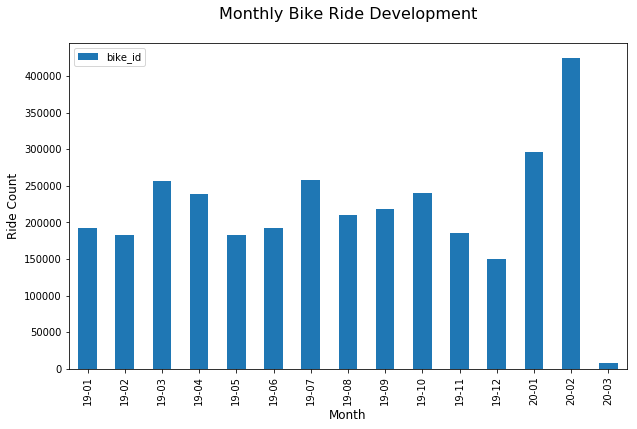

In [30]:
#let's truncate the hour to aggregate bike rides by month.
df_clean['start_time_year_month'] = df_clean['start_time'].dt.strftime('%y' + '-' + '%m')

#Then create a new dataframe by grouping by start_time_dat on bike trip count
daily_bike_rides  = pd.DataFrame(df_clean.groupby('start_time_year_month')['bike_id'].count())
daily_bike_rides.sort_values('start_time_year_month').plot(kind='bar', figsize = (10,6));
plt.title('Monthly Bike Ride Development\n', size = 16);
plt.xlabel('Month', size = 12);
plt.ylabel('Ride Count', size = 12);

When we check the number of monthly bike ride development, we can oberve that there has been a peak period in 2019 Q4, however a huge drop must not be avoided in March 2020. Considering the huge difference between February and March 2020 (and thinking about the current global issue), we might interpret this drop with COVID-19 pandemic and US's self-quarantine practices.

### On which week days do we observe more rides?

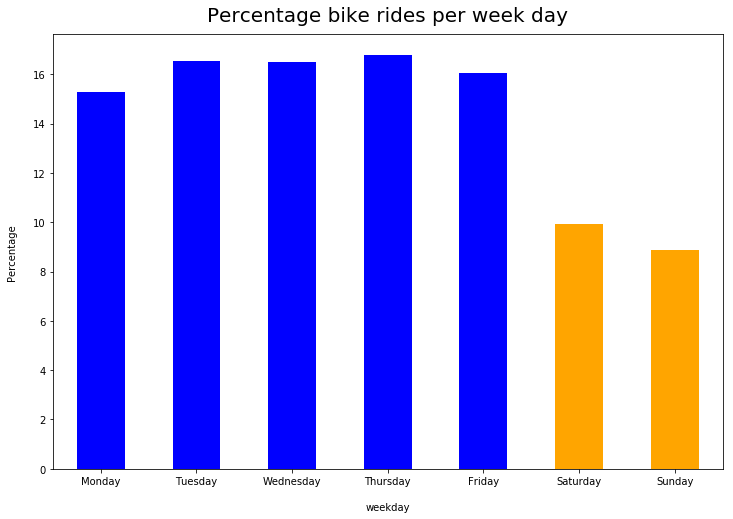

In [31]:
weekday_trips = df_clean.groupby('weekday').agg({'bike_id':'count'})
weekday_trips['perc'] = (weekday_trips['bike_id']/weekday_trips['bike_id'].sum())*100
weekday_index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

colors = ['blue', 'blue', 'blue', 'blue', 'blue', 'orange', 'orange']
weekday_trips.reindex(weekday_index)['perc'].plot(kind='bar', color=colors, figsize=(12,8), legend=False)
plt.title('Percentage bike rides per week day', fontsize=20, y=1.015);
plt.xlabel('weekday', labelpad=16);
plt.ylabel('Percentage', labelpad=16);
plt.xticks(rotation=360);

Although we might have expected that bike rides should increase on the weekends (maybe they go out with their friends, families, spend more time outside, etc), we actually see a drop in the weekends, whereas Mon-Fri usage is almost equally distributed to the week. 

This is an interesting point and we will do a further investigation on this.

### On which week day/ hour of the day do we observe more rides?

In [32]:
#creating a new dataframe by grouping by week day and start hour on number of bike trips 
hour_df = df_clean.groupby(['weekday', 'start_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

hour_df['count_perc'] = hour_df['count'].apply(lambda x: (x/hour_df['count'].sum())*100)

hour_df['rank'] = hour_df['count_perc'].rank(ascending=False).astype(int)

hour_df['weekday'] = pd.Categorical(hour_df['weekday'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

hour_df_pivoted = hour_df.pivot_table(index='start_hour', columns='weekday', values='rank').astype(int)

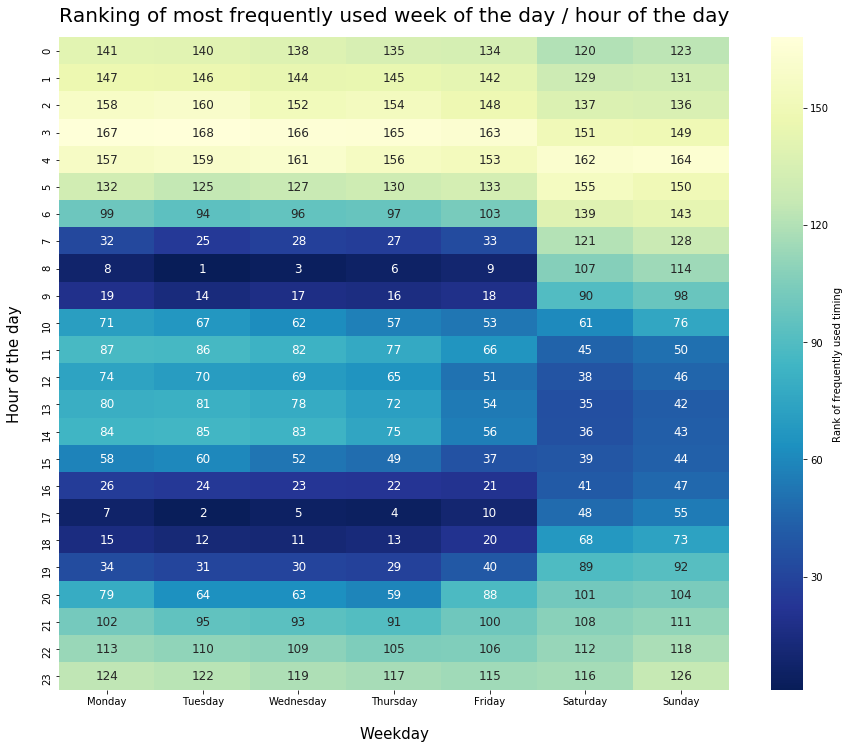

In [33]:
plt.figure(figsize=(15,12))
sb.heatmap(hour_df_pivoted, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 12}, cbar_kws={'label': 'Rank of frequently used timing'});
plt.title("Ranking of most frequently used week of the day / hour of the day", y=1.015, size = 20);
plt.xlabel('Weekday', labelpad=20, size = 15);
plt.ylabel('Hour of the day', labelpad=20, size= 15);

In the previous plot, we have observed that users prefer to use bike-sharing system during the day than the weekend. When we check this heatmap above, we can see that the most frequently used time slots are before and after working hours. Therefore, here we can interpret that people use this system not only to go from point A to B on leisure time, but also as a communiting system in their daily life during the week.

Weekend usage however shows us a different side of bike sharing system. While people rent bike during the week between7-9 and 17-20 during the week, we see a slight increase on bike rides during the weekend, between 12 - 3 (comparing to the same time slots during the week). This shows us the fact that people actually use bike sharing system not only on work-related commuting, but also for their free time during the weekend.

### Which user types have been growing over the last months? (ikili bar)

In [34]:
user_type_count_per_year_df = df_clean.groupby(["start_time_year_month", "user_type"]).size().reset_index()

In [35]:
customer_share =  round(df_clean[df_clean['user_type'] == 'Customer'].shape[0] / df_clean.shape[0],2)
subscriber_share =  round(df_clean[df_clean['user_type'] == 'Subscriber'].shape[0] / df_clean.shape[0],2)

print(customer_share, subscriber_share)

0.24 0.76


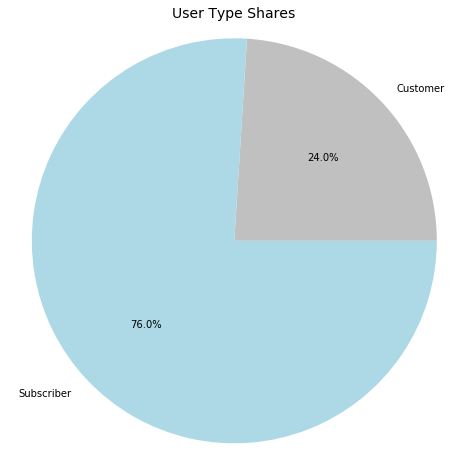

In [36]:
fig = plt.gcf()
fig.set_size_inches(8,8)

my_colors = ['silver','lightblue']
shares= [customer_share, subscriber_share]
user_labels = 'Customer','Subscriber'
plt.pie(shares ,labels=user_labels,autopct='%1.1f%%', colors = my_colors)
plt.title('User Type Shares', size = 14)
plt.axis('equal')
plt.show()


In the pie chart above, we can see that subscribers have a dominancy and make 76% of the total bike rides in 2019 and 2020 year to March.

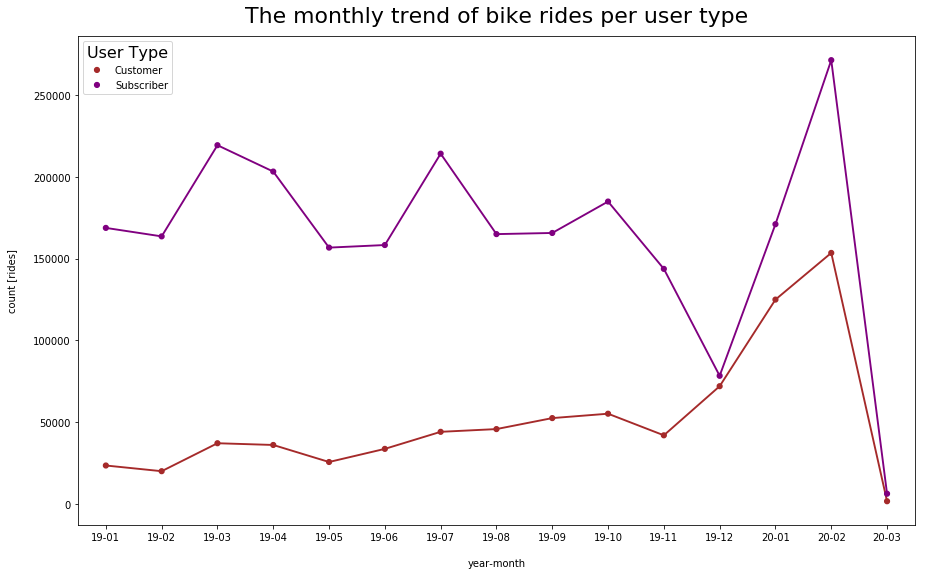

In [37]:
plt.figure(figsize=(15,9))
my_palette = {'Subscriber':'purple', 'Customer':'brown'}
ax = sb.pointplot(x='start_time_year_month', y=0, hue='user_type', palette=my_palette, scale=.7, data=user_type_count_per_year_df)
plt.title('The monthly trend of bike rides per user type', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':16})
ax = plt.gca()

In order to have a more profound understanding, here we go a step further and analyse user type behaviors in given time period. 

Here above we compare subscribers and customers historical development over the last year. There have been a significant gap between two types until Dec'19, however we observe a small shrink by the end of the last quarter of 2019. 

Two points' joining in Dec'19 does not have to be specifically interpreted as Fordgo is losing its subscribers, but can be explained with Christmas period and off time. 2020 first two months' trend can support this argument.

### Do we see different  behaviours on the week of the day/hour of the day between subscribers and customers?

In [38]:
#Tranforming the subscriber hour of the day data
subscriber_hour_df = df_clean[df_clean['user_type'] == 'Subscriber'].groupby(['weekday', 'start_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

subscriber_hour_df['count_perc'] = subscriber_hour_df['count'].apply(lambda x: (x/subscriber_hour_df['count'].sum())*100)

subscriber_hour_df['rank'] = subscriber_hour_df['count_perc'].rank(ascending=False).astype(int)

subscriber_hour_df['weekday'] = pd.Categorical(subscriber_hour_df['weekday'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

subscriber_hour_df_pivoted = subscriber_hour_df.pivot_table(index='start_hour', columns='weekday', values='rank').astype(int)


#Tranforming the customer hour of the day data
customer_hour_df = df_clean[df_clean['user_type'] == 'Customer'].groupby(['weekday', 'start_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

customer_hour_df['count_perc'] = customer_hour_df['count'].apply(lambda x: (x/customer_hour_df['count'].sum())*100)

customer_hour_df['rank'] = customer_hour_df['count_perc'].rank(ascending=False).astype(int)

customer_hour_df['weekday'] = pd.Categorical(customer_hour_df['weekday'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

customer_hour_df_pivoted = customer_hour_df.pivot_table(index='start_hour', columns='weekday', values='rank').astype(int)

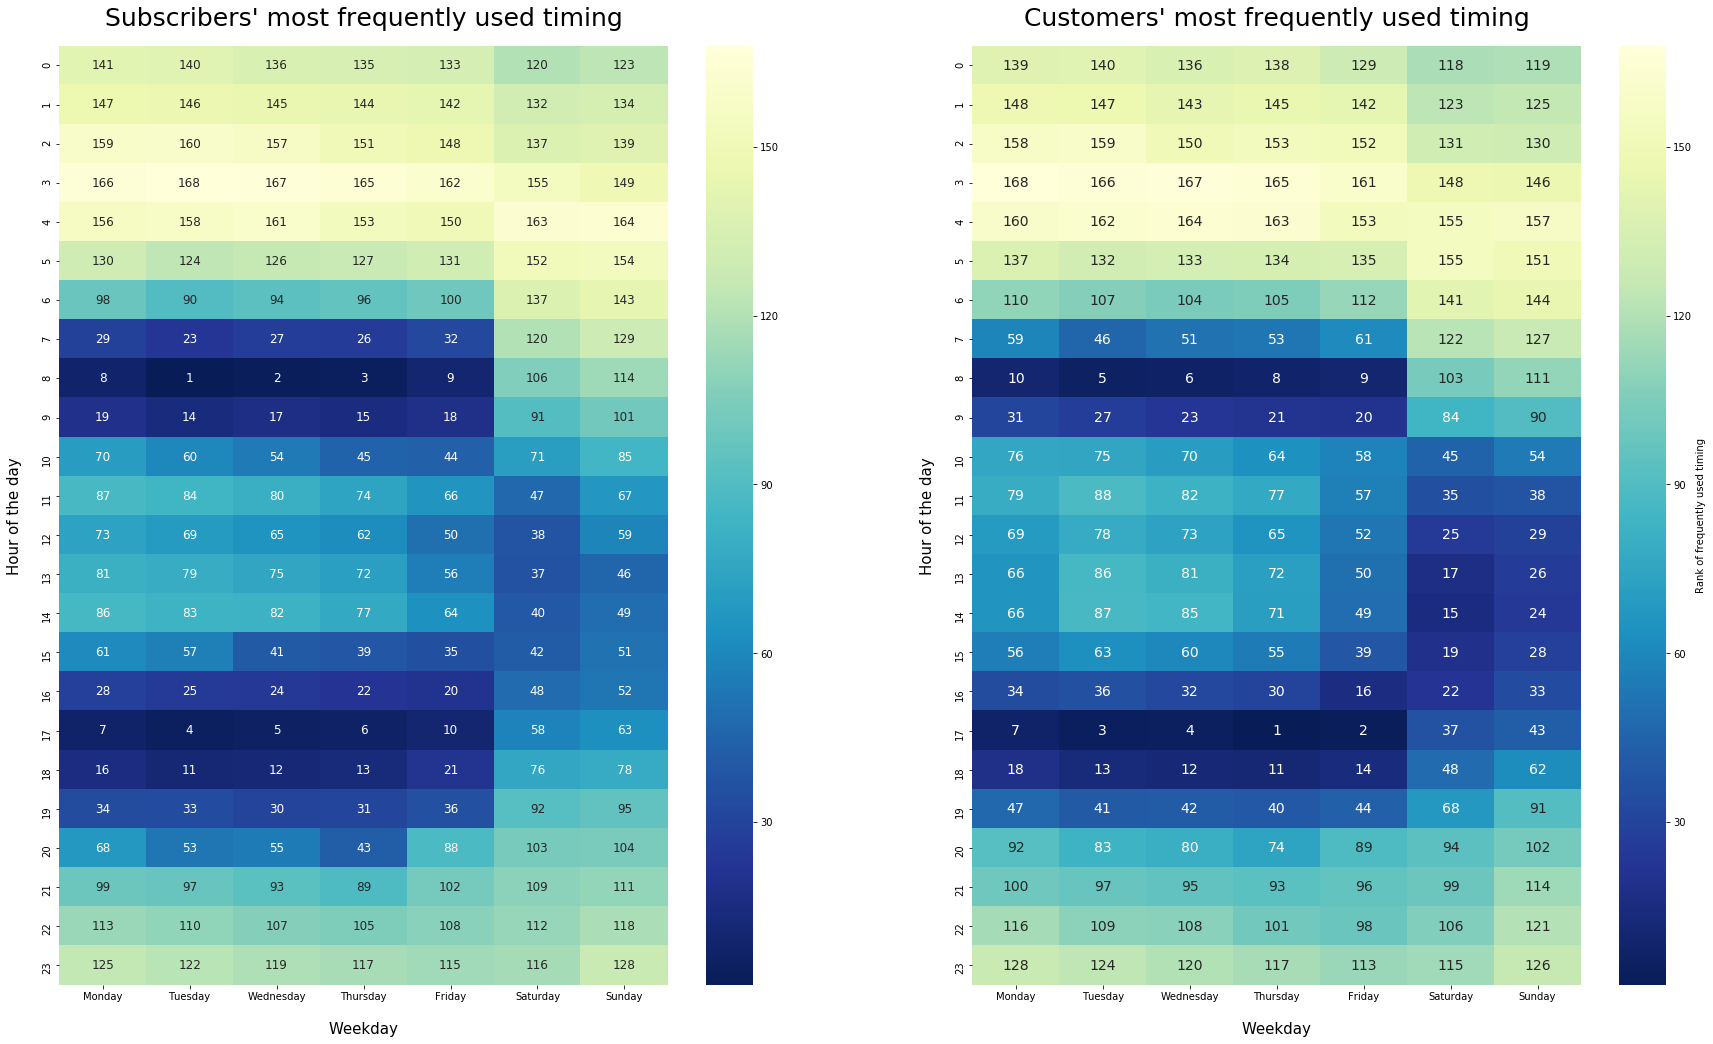

In [39]:
# 1st plot: subscribers
plt.figure(figsize=(30,38))

plt.subplot(221)
sb.heatmap(subscriber_hour_df_pivoted, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 12});
plt.title("Subscribers' most frequently used timing", y=1.015, size = 25);
plt.xlabel('Weekday', labelpad=20, size = 15);
plt.ylabel('Hour of the day', labelpad=20, size= 15);

# 2nd plot: customers
plt.subplot(222)
#plt.figure(figsize=(15,12))
sb.heatmap(customer_hour_df_pivoted, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 14}, cbar_kws={'label': 'Rank of frequently used timing'});
plt.title("Customers' most frequently used timing", y=1.015, size = 25);
plt.xlabel('Weekday', labelpad=20, size = 15);
plt.ylabel('Hour of the day', labelpad=20, size= 15);

To understand user type behaviors in broader manner, we create two heatmaps showing the day of the week, hour of the day and rank of the bike ride count for each user type. 

1. Seems like subscribers use bike sharing system strictly at 7-9 and 16-19 whereas it is slightly more fragmented for customers between Monday to Friday.

2. Customers (casual users, non subscribers) definitely use bike sharing system more than subscribers on the weekend. 

As a result, we might that say subscribers do subscribe this system for daily communting to school or work.

### What is the average trip duration per user group?

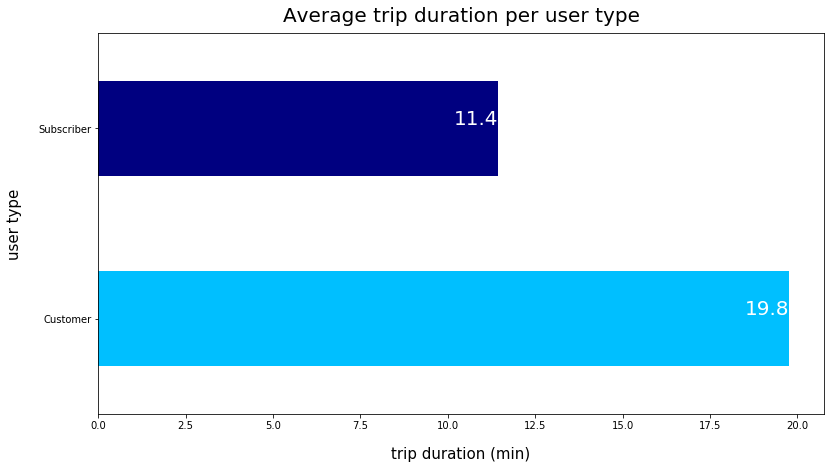

In [40]:
df_clean['duration_min'] = df_clean['duration_sec'] / 60

new_color = ['deepskyblue','navy']
ax = df_clean.groupby(['user_type'])['duration_min'].mean().plot(kind='barh',color = new_color,figsize = (13,7));
[ax.text(v, i, '{:.1f}'.format(v), fontsize=20, horizontalalignment='right', verticalalignment = 'bottom', color='white') for i, v in enumerate(df_clean.groupby(['user_type'])['duration_min'].mean())];
ax.set_title('Average trip duration per user type', fontsize=20, y=1.015)
ax.set_ylabel('user type', labelpad=16, size = 15)
ax.set_xlabel('trip duration (min)', labelpad=16, size =15);

When we split average trip duration values to user types, we can observe that subscribers take bike trips for short duration (11.4 mins) whereas customers take it for almost twice the duration (19.8 min)

### What is the average trip distance per user group?

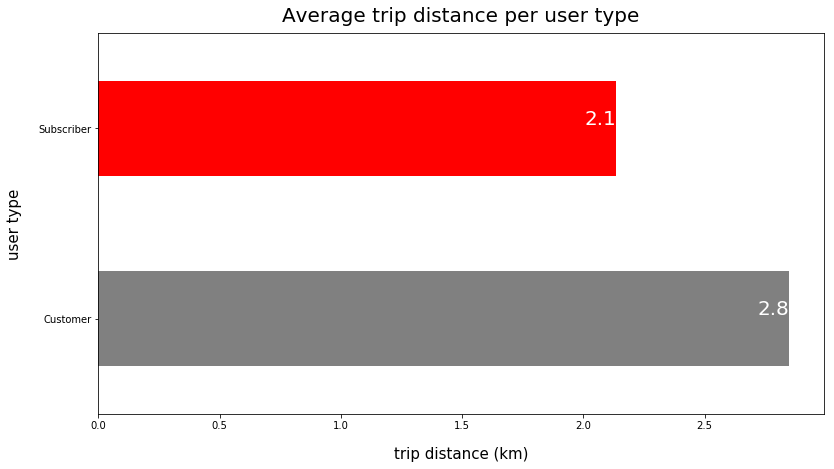

In [41]:
new_color = ['grey','red']
ax = df_clean.groupby(['user_type'])['distance_km'].mean().plot(kind='barh',color = new_color,figsize = (13,7));
[ax.text(v, i, '{:.1f}'.format(v), fontsize=20, horizontalalignment='right', verticalalignment = 'bottom', color='white') for i, v in enumerate(df_clean.groupby(['user_type'])['distance_km'].mean())];
ax.set_title('Average trip distance per user type', fontsize=20, y=1.015)
ax.set_ylabel('user type', labelpad=16, size = 15)
ax.set_xlabel('trip distance (km)', labelpad=16, size =15);

Similar with trip duration plot, we see different behaviors between user types, where customers use bike sharing system for comparably longer distance trips (2.8 km) than subscribers (2.1 km)

### Who is faster rider, subscribers or customers?

In [42]:
df_clean['speed/min']  = df_clean['distance_km'] / df_clean['duration_min']
subscriber_speed = round(df_clean[df_clean['user_type'] == 'Subscriber'].groupby(['user_type'])['speed/min'].mean()[0],2)
customer_speed = round(df_clean[df_clean['user_type'] == 'Customer'].groupby(['user_type'])['speed/min'].mean()[0],2)

Subscribers ride 0.25 km per min, whereas customers ride 0.16 km per min



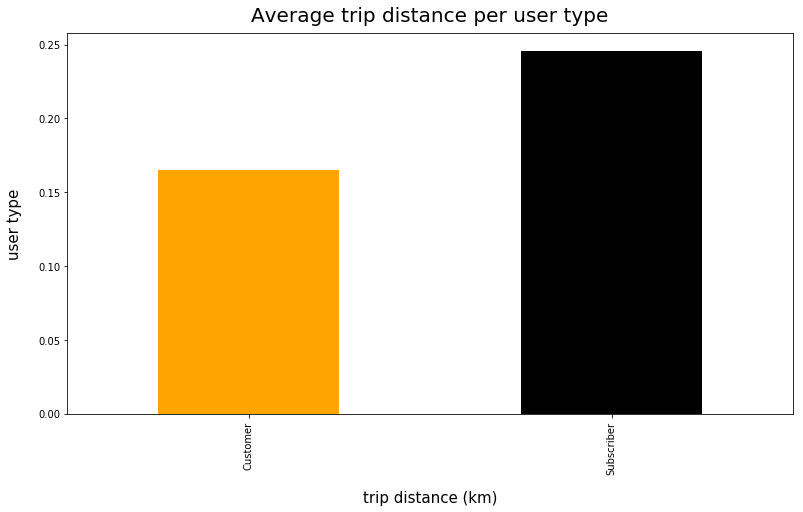

In [43]:
print('Subscribers ride {} km per min, whereas customers ride {} km per min\n'.format(subscriber_speed, customer_speed))
new_color = ['orange','black']
ax = df_clean.groupby(['user_type'])['speed/min'].mean().plot(kind='bar',color = new_color,figsize = (13,7));
ax.set_title('Average trip distance per user type', fontsize=20, y=1.015)
ax.set_ylabel('user type', labelpad=16, size = 15)
ax.set_xlabel('trip distance (km)', labelpad=16, size =15);

When we analyse each user type's speed per min, we can clearly see that subscribers ride 1.5 times faster than customers (and we can say that this is because they use bike rides more functionally, such as daily commuting)

### How rental access methods behave differently in each user type?

In [44]:
#rental method types are given in the dataframe only after June'19, therefore we should filter the dataframe to make a neat chart.
filtered_dates = ('19-06', '19-07', '19-08', '19-09', '19-10', '19-11', '19-12', '20-01', '20-02', '20-03')

#filter selected dates

df_clean_rental = df_clean[df_clean['start_time_year_month'].isin(filtered_dates)]

In [45]:
df_clean.groupby(['user_type', 'rental_access_method'])['bike_id'].count()

user_type   rental_access_method
Customer    app                      78037
            clipper                   2624
Subscriber  app                     494929
            clipper                  48837
Name: bike_id, dtype: int64

In [46]:
app_subs_count = 494929
clipper_subs_count = 48837
app_cust_count = 78037
clipper_cust_count = 2624
subs_count = app_subs_count + clipper_subs_count
cust_count = app_cust_count + clipper_cust_count

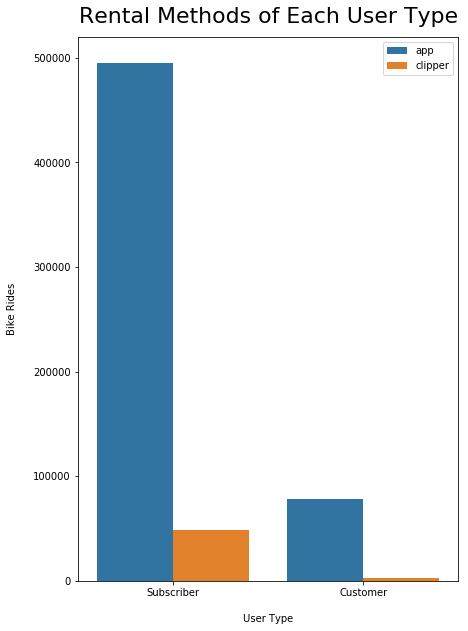

In [47]:
cat2_order = ['app', 'clipper']
cat1_order = ['Subscriber', 'Customer']

plt.figure(figsize = [15, 10])

# left plot: clustered bar chart, absolute counts
plt.subplot(1, 2, 1)
ax = sb.countplot(data = df_clean_rental, x = 'user_type', hue = 'rental_access_method',
             order = cat1_order, hue_order = cat2_order);

plt.title('Rental Methods of Each User Type', fontsize=22, y=1.015)
plt.xlabel('User Type', labelpad=16)
plt.ylabel('Bike Rides', labelpad=16)
plt.legend();

As we can observe, a big majority of the people use app than clipper.

91% of the subscribers use app and this share increase to 97% for customers.

### What kind of trend do we observe on Bike Share for All users?

In [48]:
bikeshareforall_share =  round(df_clean[df_clean['bike_share_for_all_trip'] == 'Yes'].shape[0] / df_clean.shape[0],2)
non_bikeshareforall_share =  round(df_clean[df_clean['bike_share_for_all_trip'] == 'No'].shape[0] / df_clean.shape[0],2)
no_member_data = 0.31

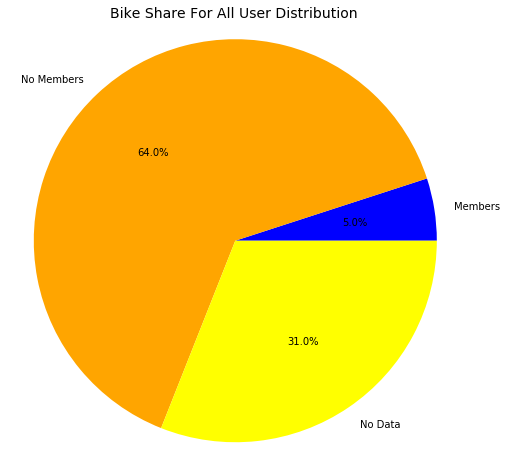

In [49]:
fig = plt.gcf()
fig.set_size_inches(8,8)

my_colors = ['blue','orange', 'yellow']
shares= [bikeshareforall_share, non_bikeshareforall_share, no_member_data]
user_labels = 'Members','No Members', 'No Data'
plt.pie(shares ,labels=user_labels,autopct='%1.1f%%', colors = my_colors)
plt.title('Bike Share For All User Distribution', size = 14)
plt.axis('equal')
plt.show()


We only have membership data for 70% of the bike rides, 64% of those rides do not belong to a Bike Share For All member.

## Summary

Since there was a variable scarcity with the new update in the dataset, I checked the different behaviours between user types like subscribers and customers (non subscribers).

- Monthly Bike Ride counts have been slowly developing in 2019 and reached the peak point especially in February 2020. However, we see a huge drop in March 2020, which was not predictable considering the historical trend. 


- Users usually prefer to rent bikes during the week than the weekend. Week days have approximately around 14-15% of the total share, where this number drops to 8-10% during the weekend


- Most rides are taken during the week days, between 7-9 in the morning or 17-19 in the evening.  We can also observe that there a little increase on the lunch time around 12.


- We see a more active evening/night bike rent behavior in the weekend than the week days (12-4 am in the morning seems more active in the weekends than the week days.)


- There is a big gap in customers and subscribers share.  Subscribers make 76% of the total bike rides whereas customers have only 24%


- The gap between subscribers and customers share has almost closed in Dec'19 but then increased again in 2020.


- Subscribers use bike sharing system more strictly at 7-9 and 16-19 whereas it is slightly more fragmented for customers between Monday to Friday.


- Customers use bike sharing system more than subscribers on the weekend. 


- Subscribers take bike trips for short duration (11.4 mins) whereas customers take it for almost twice the duration (19.8 min)


- Similar with trip duration plot, we see different behaviors between user types, where customers use bike sharing system for comparably longer distance trips (2.8 km) than subscribers (2.1 km)


- Subscribers ride 1.5 times faster than customers (and we can hypothetically assume that this is because they use bike rides more functionally, such as daily commuting)


- 91% of the subscribers use app and this share increase to 97% for customers.


- We only have membership data for 70% of the bike rides, 64% of those rides do not belong to a Bike Share For All member